In [1]:
"""
Author: Aditya Goel 400414715, MEST'21, McMaster University
SEP787: Machine Learning: Classification Models
Assignment 2
References: 
1. Dr. Jeff Fortuna's SEP 787 Lecture Notes
"""

"\nAuthor: Aditya Goel 400414715, MEST'21, McMaster University\nSEP787: Machine Learning: Classification Models\nAssignment 2\nReferences: \n1. Dr. Jeff Fortuna's SEP 787 Lecture Notes\n"

**Import Libraries**

In [2]:
import warnings
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

**Import Dataset**

In [3]:
df = pd.read_excel('training.xlsx')
len = len(df)

**Initialize Probability Variables**

In [4]:
count_universities = 0                                                          #Count of total universities
count_public = 0                                                                #Count of total public universities
count_private = 0                                                               #Count of total private universities
count_state = np.zeros((3,2))                                                   #Count of different states
rating_acad = np.zeros((5,2))                                                   #Count of different academic ratings
rating_social = np.zeros((5,2))                                                 #Count of different social ratings
rating_QoL = np.zeros((5,2))                                                    #Count of different QoL ratings  

**Function to convert University states to numeric values**

In [5]:
def state_to_number(i):
  dict = {"New York": 1, "Massachusetts": 2, "California": 3}
  state = df["University State"][i]
  df["University State"][i] = dict.get(state)                                   #Replace state with its numeric value    

**Function to assign data to variables**

In [6]:
def assign_data(count, class_index, i):
  count = count+1

  acad_value = df["Acads"][i]
  rating_acad[acad_value-1][class_index]= rating_acad[acad_value-1][class_index] + 1            #increment private Acads index by 1

  social_value = df["Social"][i]
  rating_social[social_value-1][class_index]= rating_social[social_value-1][class_index] + 1    #increment private Social index by 1

  QoL_value = df["Quality of Life"][i]
  rating_QoL[QoL_value-1][class_index]= rating_QoL[QoL_value-1][class_index] + 1                #increment private QoL index by 1

  state_value = df["University State"][i]
  count_state[state_value-1][class_index]= count_state[state_value-1][class_index] + 1          #increment state index by 1

  return [count, rating_acad, rating_social, rating_QoL, count_state]

**Function to obtain marginal probabilities for discrete variables**

In [7]:
def get_marginal_prob(feature, rating):
  rating[:,0] = rating[:,0]/ count_public                                       #Obtain Marginal probabilities for Class = Public
  rating[:,1] = rating[:,1]/count_private                                       #Obtain Marginal probabilities for Class = Private    
  print("\n" + feature + "(Public, Private) probability is: \n", rating)
  return rating

**Function to calculate Mean and sd for continuous variables**

In [8]:
def params_normalDist(sat_section, university_class):
  mean = np.mean(df[sat_section][df["Type"]==university_class])                 #Calculate Mean
  sd = np.std(df[sat_section][df["Type"]==university_class])                    #Calculate Standarad Deviation
  return [mean, sd]

**Function to create Normal Distribution**

In [9]:
def normalDist(x, mean, sd):     
  var = sd**2
  numerator = np.exp((-1/2)*((x-mean)**2) / (2 * var))
  denominator = np.sqrt(2 * np.pi * var)
  prob = numerator / denominator                                                #Formula for Normal Distribution pdf
  return prob    

**Function to calculate probabilities for Test set**

In [10]:
def prob_given_params(state, sat_v, sat_m, rate_acad, rate_social, rate_QoL):

  prob_uni_array = [0, 0]
  prob_class = [prob_public, prob_private]

  for i in range(2):
    prob_state = state_prob[state-1,i]
    prob_sat_v = normalDist(sat_v, mean[i][0], sd[i][0])
    prob_sat_m = normalDist(sat_m, mean[i][1], sd[i][1])
    prob_acad = acad_prob[rate_acad-1,i]
    prob_social = social_prob[rate_social-1,i]
    prob_QoL = QoL_prob[rate_QoL-1,i]
    
    prob_uni_array[i] = prob_class[i] * prob_state * prob_sat_v * prob_sat_m * prob_acad * prob_social * prob_QoL

    # print(prob_state, prob_acad, prob_social, prob_QoL)

  # print(prob_uni_array)
  return prob_uni_array

**Function to Classify and print result**

In [11]:
def classification(uni_name, prob_uni_array):
  if (prob_uni_array[0] > prob_uni_array[1]): 
    print(uni_name + "Public")
    y_pred.append("Public")
  if (prob_uni_array[0] < prob_uni_array[1]): 
    print(uni_name + "Private")
    y_pred.append("Private")
  if (prob_uni_array[0] == prob_uni_array[1]): 
    print(uni_name + "Cannot be classified")
    y_pred.append("NA")

***Main Function***

In [12]:
#Obtain values of different variables

for i in range(len):
  count_universities = count_universities + 1                                 
  state_to_number(i)
  if (df["Type"][i]=="public"):
    [count_public, rating_acad, rating_social, rating_QoL, count_state] = assign_data(count_public, 0, i)
  if (df["Type"][i]=="private"):
    [count_private, rating_acad, rating_social, rating_QoL, count_state] = assign_data(count_private, 1, i)

#Obtain Marginal Probabilities for Discrete Variables

prob_public = count_public/count_universities
prob_private = count_private/count_universities
acad_prob = get_marginal_prob("Acads", rating_acad)
social_prob = get_marginal_prob("Social", rating_social)
QoL_prob = get_marginal_prob("QoL", rating_QoL)
state_prob = get_marginal_prob("State", count_state)

#Obtain Mean and Standard Deviations for Continuous Variables

[sat_v_public_mean, sat_v_public_sd] = params_normalDist("SAT (verbal)", "public")
[sat_v_private_mean, sat_v_private_sd] = params_normalDist("SAT (verbal)", "private")
[sat_m_public_mean, sat_m_public_sd] = params_normalDist("SAT (math)", "public")
[sat_m_private_mean, sat_m_private_sd] = params_normalDist("SAT (math)", "private")

mean = [[sat_v_public_mean, sat_m_public_mean], [sat_v_private_mean, sat_m_private_mean]]
sd = [[sat_v_public_sd, sat_m_public_sd],[sat_v_private_sd, sat_m_private_sd]]

print("\nMean [(v_public m_public), (v_private m_private)] is: ", mean)
print("SD [(v_public m_public), (v_private m_private)] is: ", sd)



Acads(Public, Private) probability is: 
 [[0.  0. ]
 [0.1 0.1]
 [0.3 0. ]
 [0.5 0.4]
 [0.1 0.5]]

Social(Public, Private) probability is: 
 [[0.  0.1]
 [0.3 0.1]
 [0.5 0.4]
 [0.2 0.3]
 [0.  0.1]]

QoL(Public, Private) probability is: 
 [[0.  0. ]
 [0.3 0.1]
 [0.5 0.6]
 [0.2 0.2]
 [0.  0.1]]

State(Public, Private) probability is: 
 [[0.4 0.2]
 [0.2 0.5]
 [0.4 0.3]]

Mean [(v_public m_public), (v_private m_private)] is:  [[496.2, 542.0], [582.5, 621.5]]
SD [(v_public m_public), (v_private m_private)] is:  [[35.12776679494443, 45.34313619501854], [73.35700375560604, 94.86964741159314]]


**Test**

In [13]:
#Classification on Test Set
y_pred = []

prob_Albany_array = prob_given_params(1, 525, 575, 4, 3, 3)
classification("The University of Albany is: ", prob_Albany_array)

prob_Syaracruse_array = prob_given_params(1, 600, 600, 4, 4, 4)
classification("Syracruse University is: ", prob_Syaracruse_array)

prob_Tufts_array = prob_given_params(1, 580, 620, 4, 4, 4)
classification("The University of Tufts is: ", prob_Tufts_array)

prob_GGC_array = prob_given_params(2, 500, 500, 2, 1, 1)
classification("Golden Gate College: ", prob_GGC_array)

prob_SJS_array = prob_given_params(2, 425, 565, 4, 2, 3)
classification("San Jose University: ", prob_SJS_array)

print("y_pred array is: ", y_pred)

The University of Albany is: Public
Syracruse University is: Private
The University of Tufts is: Private
Golden Gate College: Cannot be classified
San Jose University: Public
y_pred array is:  ['Public', 'Private', 'Private', 'NA', 'Public']


**Confusion Matrix**

[[0 0 0]
 [1 2 0]
 [0 0 2]]


<AxesSubplot:>

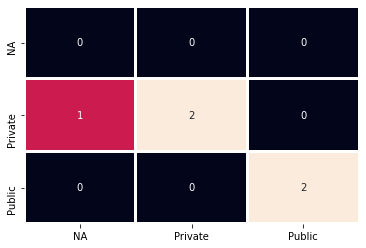

In [14]:
from sklearn.metrics import confusion_matrix

y_actual = ["Public", "Private", "Private", "Private", "Public"]
conf_matrix = confusion_matrix(y_actual, y_pred)
print(conf_matrix)

import seaborn as sn
plot_cm = pd.DataFrame(conf_matrix, index = [i for i in ["NA", "Private", "Public"]], columns = [i for i in ["NA", "Private", "Public"]])
sn.heatmap(plot_cm, annot=True, linewidths=2, linecolor='white', cbar=False)